<a href="https://colab.research.google.com/github/cc-skuehn/Workshop_Manifold_Learning/blob/master/Notebooks/Manifold_S_Dataset_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manifold Learning - The S Dataset

## Example code is using the following template
http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html
    
### Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

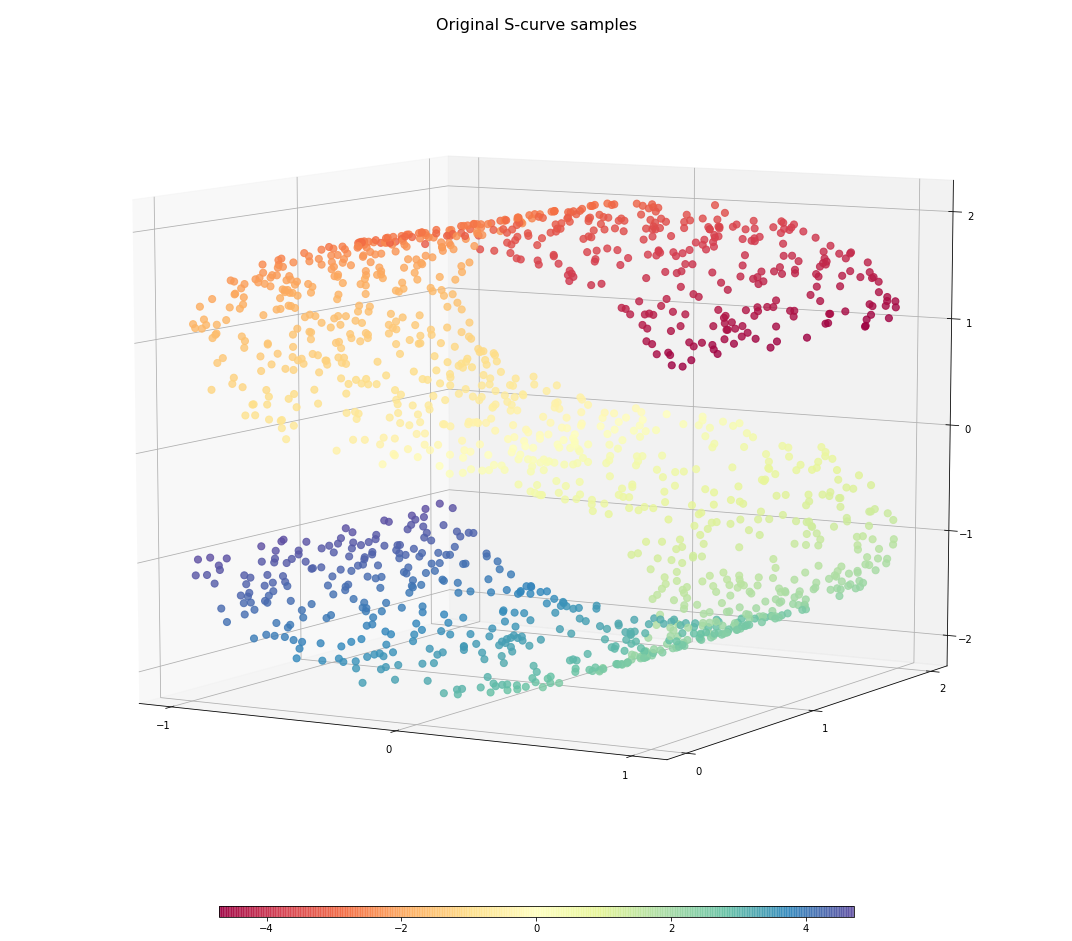

In [18]:
# Adjustments by S.Kuehn, stefan.kuehn@posteo.de
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt
from matplotlib import ticker

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import manifold, datasets

rng = RandomState(0)

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=rng)

def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(15, 15),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8, cmap=plt.cm.Spectral)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color, cmap=plt.cm.Spectral)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8, cmap=plt.cm.Spectral)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "Original S-curve samples")


## Manifold Learning Methods

LLE Standard: 0.18 sec
LLE LTSA: 0.44 sec
LLE Hessian: 0.52 sec
LLE Modified: 0.41 sec


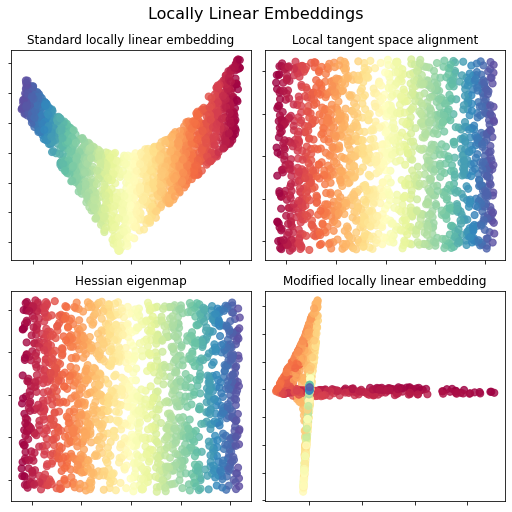

MDS: 5.2 sec


(-1.628763115664508,
 1.6963810285973655,
 -2.5216656367377035,
 2.5325373014656165)

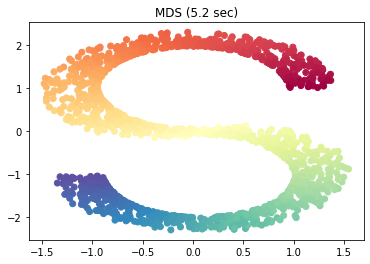

In [19]:
n_points = 500 # uncomment if 1500 is too much / runtime is too long
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

params = {
    "n_neighbors": n_neighbors,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": rng,
}

X = S_points
color = S_color

t0 = time()
lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(S_points)
t1 = time()
print("LLE Standard: %.2g sec" % (t1 - t0))

t0 = time()
lle_ltsa = manifold.LocallyLinearEmbedding(method="ltsa", **params)
S_ltsa = lle_ltsa.fit_transform(S_points)
t1 = time()
print("LLE LTSA: %.2g sec" % (t1 - t0))

t0 = time()
lle_hessian = manifold.LocallyLinearEmbedding(method="hessian", **params)
S_hessian = lle_hessian.fit_transform(S_points)
t1 = time()
print("LLE Hessian: %.2g sec" % (t1 - t0))

t0 = time()
lle_mod = manifold.LocallyLinearEmbedding(method="modified", modified_tol=0.8, **params)
S_mod = lle_mod.fit_transform(S_points)
t1 = time()
print("LLE Modified: %.2g sec" % (t1 - t0))

fig, axs = plt.subplots(
    nrows=2, ncols=2, figsize=(7, 7), facecolor="white", constrained_layout=True
)
fig.suptitle("Locally Linear Embeddings", size=16)

lle_methods = [
    ("Standard locally linear embedding", S_standard),
    ("Local tangent space alignment", S_ltsa),
    ("Hessian eigenmap", S_hessian),
    ("Modified locally linear embedding", S_mod),
]
for ax, method in zip(axs.flat, lle_methods):
    name, points = method
    add_2d_scatter(ax, points[:,0:2], S_color, name)
#    add_2d_scatter(ax, points[:,1:], S_color, name)

plt.show()

t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
plt.axis('tight')


#t0 = time()
#se = manifold.SpectralEmbedding(n_components=n_components,
#                                n_neighbors=n_neighbors)
#Y = se.fit_transform(X)
#t1 = time()
#print("SpectralEmbedding: %.2g sec" % (t1 - t0))
#ax = fig.add_subplot(259)
#plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
#plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
#plt.axis('tight')

#t0 = time()
#tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
#Y = tsne.fit_transform(X)
#t1 = time()
#print("t-SNE: %.2g sec" % (t1 - t0))
#ax = fig.add_subplot(2, 5, 10)
#plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
#plt.title("t-SNE (%.2g sec)" % (t1 - t0))
#plt.axis('tight');

## Oh, I made a tiny change to the example, let's use the original settings

standard: 0.29 sec
ltsa: 0.32 sec
hessian: 0.3 sec
modified: 0.32 sec
Isomap: 1 sec
MDS: 5.2 sec
SpectralEmbedding: 0.38 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


t-SNE: 11 sec


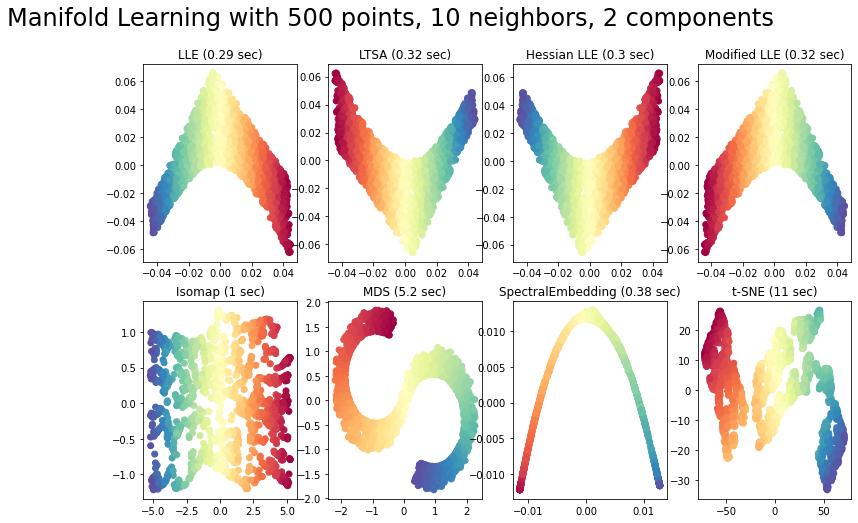

In [22]:
# Let's re-run the example
# In case you experience problems with any of the methods that are using eigen_solver='auto', try switching to eigen_solver='dense'
# Runtime for more than 1000 points can be up to 2 minutes

n_points = 500
n_neighbors = 10
n_components = 2 # This is the parameter that I changed to 3 in the above example
X = S_points
color = S_color

fig = plt.figure(figsize=(16, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors, %i components"
             % (n_points, n_neighbors, n_components), fontsize=24)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(method="standard", **params).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_components=2).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.axis('tight');

## We can be much faster when using Random Projections

http://scikit-learn.org/stable/modules/random_projection.html

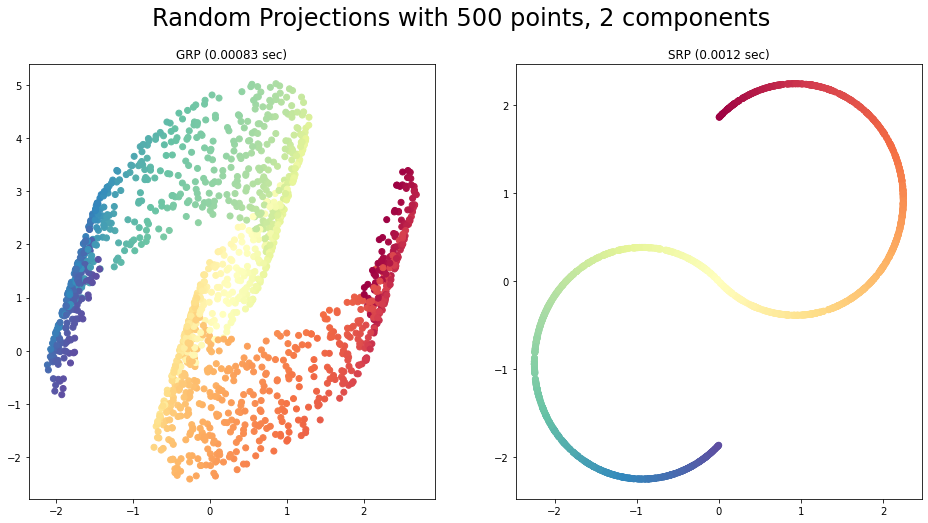

In [10]:
from sklearn import random_projection

X = S_points
color = S_color
fig = plt.figure(figsize=(16, 8))
plt.suptitle("Random Projections with %i points, %i components"
             % (n_points, n_components), fontsize=24)

init_random_state=0

t0 = time()
transformer = random_projection.GaussianRandomProjection(n_components=2, random_state=init_random_state)
Y = transformer.fit_transform(X)
t1 = time()
    
ax = fig.add_subplot(121)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('GRP', t1 - t0))
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
transformer = random_projection.SparseRandomProjection(n_components=2, random_state=init_random_state)
Y = transformer.fit_transform(X)
t1 = time()
    
ax = fig.add_subplot(121+1)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('SRP', t1 - t0))
plt.axis('tight');

## The Classical Method: PCA

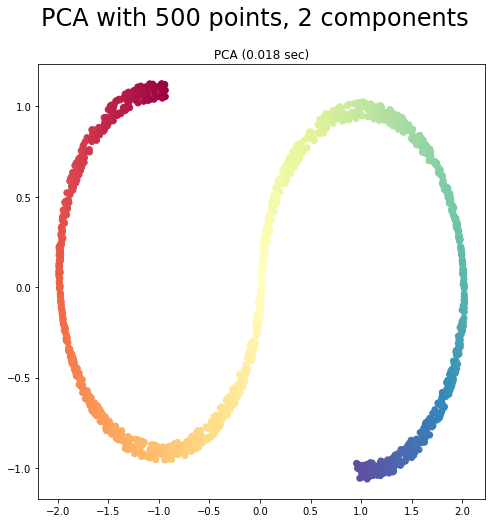

In [23]:
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 8))
plt.suptitle("PCA with %i points, %i components"
             % (n_points, n_components), fontsize=24)

init_random_state=10

t0 = time()
pca = PCA(n_components=2,random_state=init_random_state)
Y = pca.fit_transform(X)
t1 = time()
    
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('PCA', t1 - t0))
plt.axis('tight');

## UMAP

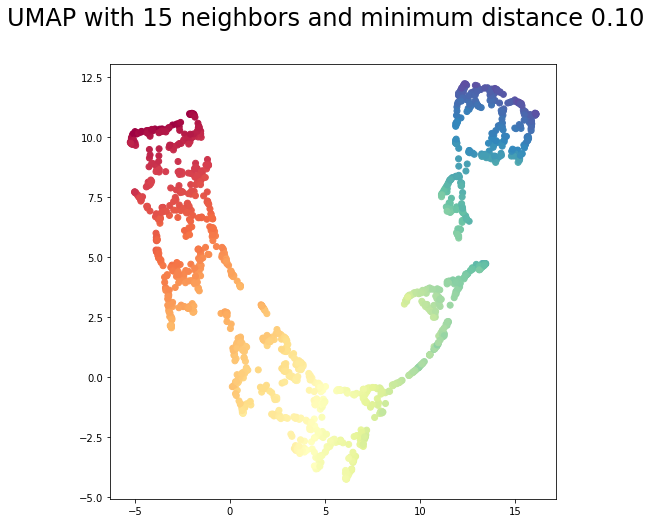

In [30]:
import umap
# install this first, check if colab supports this!
# https://umap-learn.readthedocs.io/en/latest/plotting.html
# umap.plot is available only in version 0.4dev, waiting for 0.4 to be released
# Follow the instruction from here: https://github.com/lmcinnes/umap/issues/305
#import umap.plot as uplt
#mapper = umap.UMAP(n_neighbors=15,min_dist=0.3,metric="correlation").fit(X)
#uplt.points(mapper,labels=color)

n_neighbors=15
min_dist=0.1
# Standard approach, plotting with matplotlib
embedding = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
#                      metric='correlation').fit_transform(X)
                      metric='euclidean').fit_transform(X)
fig = plt.figure(figsize=(8, 8))
plt.suptitle("UMAP with %i neighbors and minimum distance %1.2f"
             % (n_neighbors, min_dist), fontsize=24)

ax = fig.add_subplot(111)
ax.scatter(
    embedding[:, 0], embedding[:, 1], c=color, cmap=plt.cm.Spectral
)
plt.show()

In [26]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.5 MB/s 
     |████████████████████████████████| 1.1 MB 47.0 MB/s 
     |████████████████████████████████| 18.2 MB 598 kB/s 
     |████████████████████████████████| 76 kB 5.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=f18992f37fe46bd6d4ae8dc1aa6f0dde56d6bc62283955ad41b082ef1dc310b6
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=b4c099de1322d8d134e4a4155dcc7ddc878795e5850f154ea10271015167a9db
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59438 sha256=e3944bbdd1a2ccdd6c73f6cca644a7cee1779b725443b99244

In [ ]:
# Documentation of umap
#umap.UMAP?

# Practical Task 1

## Scale the S curve in y direction by a scaling factor of 2 and repeat the above steps

In [ ]:
# # We now make the S wider, i.e. we scale in the direction of y
# # Hint: Copy-paste the following two lines into the first code block, uncomment them and replace ??? by the correct expression

# scaling_factor = 2.0
# ??? = scaling_factor * ???